## Homework VI - Cast Manufactured Part Classification 

This is a dataset containing the images of top view of submersible pump impeller manufactured through casting process. The goal is to develop a classification algorithm to identify the parts with defects and automate the inspection process in the manufacturing environment. Casting defect is an undesired irregularity in a metal casting process. There are many types of defect in casting like blow holes, pinholes, burr, shrinkage defects, mould material defects, pouring metal defects, metallurgical defects, etc. The dataset contains a total of 6590 images. Follow the steps below to import the data and prepare it for classification model.

<font color='red'> __Step I:__ </font>
Download the zip file coming with this notebook. Unzip it. You should have a folder `data` with two subfolders `test` and `train`. Under each subfolder there must be two other folders `def_front` and `ok_front`. Images under `def_front` are defected parts while images in `ok_front` are non-defected parts. You will be using the images under `train` folder for training your classifier and the images under `test` folder for testing the performance of your developed model. 


<font color='red'> __Step II:__ </font>:  First, let's take a look at a sample of defected and a sample of a non-defected part. Use the following code snippet to read and show an image for each case, i.e. one for defective and one for non-defective.

```python
from matplotlib.image import imread
import matplotlib.pyplot as plt

sample_image = <address to the image file>
file = imread(sample_image)
plt.imshow(file)
```

You need to replace `<address to the image file>` with the address to the image file (including the file name) you want to show. Feel free to use images from either train or test batch.

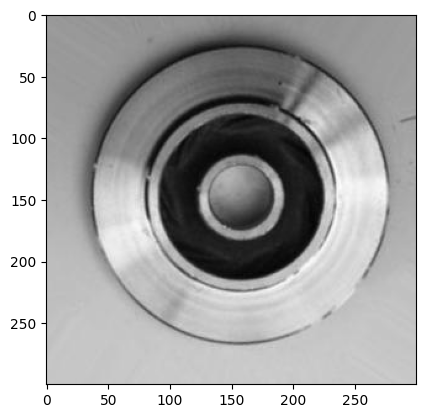

In [3]:
# your code goes here
from matplotlib.image import imread 
import matplotlib.pyplot as plt
sample_image = "C:\\Users\\tanka\\OneDrive\\바탕 화면\\Junior year\\Data_driven\\hw6\\data\\train\\def_front\\cast_def_0_215.jpeg"
file = imread(sample_image)
plt.imshow(file)


<font color='red'> __Step III:__ </font>: Let's re-format the data into an easier shape for model development. Use the following code snippet to create the training data and test data.

```python
import os
files = ['def_front', 'ok_front']

adress = <address to folder> + '{}'
data_train = {}
for f in files:
    data_train[f]=[]  # replace "data_train" with "data_test" for test data
for col in files:
    os.chdir(adress.format(col))
    for i in os.listdir(os.getcwd()):
        if i.endswith('.jpeg'):
            data_train[col].append(i)  # replace "data_train with "data_test" for test data
            
```
You need to replace `<address to folder>` with the address to training data or test data folder, depending on whether you are creating the training data or testing data. You should end up having two dictionaries, `data_train` and `data_test`, containing the labels of defective and non-defective images in the training and test data.

In [14]:
# your code goes here
import os
files = ['def_front', 'ok_front']

adress_train = 'C:\\Users\\tanka\\OneDrive\\바탕 화면\\Junior year\\Data_driven\\hw6\\data\\train\\' + '{}'
adress_test = 'C:\\Users\\tanka\\OneDrive\\바탕 화면\\Junior year\\Data_driven\\hw6\\data\\test\\' + '{}'

data_train = {}
data_test = {}

for f in files:
    data_train[f]=[]  # replace "data_train" with "data_test" for test data
for col in files:
    os.chdir(adress_train.format(col))
    for i in os.listdir(os.getcwd()):
        if i.endswith('.jpeg'):
            data_train[col].append(i)  # replace "data_train with "data_test" for test data

for f in files:
    data_test[f]=[]  # replace "data_train" with "data_test" for test data
for col in files:
    os.chdir(adress_test.format(col))
    for i in os.listdir(os.getcwd()):
        if i.endswith('.jpeg'):
            data_test[col].append(i)  # replace "data_train with "data_test" for test data         

Let's look at the distribution of the samples in the train data and test data using the following:

```python
import pandas as pd

dist = pd.DataFrame( [len( data_train['def_front'] ), len( data_train['ok_front'] )] ) # replace training data with test data to look at test data distribution
dist.plot.bar()
```

Feel free to improve the code output by adding labels and other features to the plots.

<Axes: >

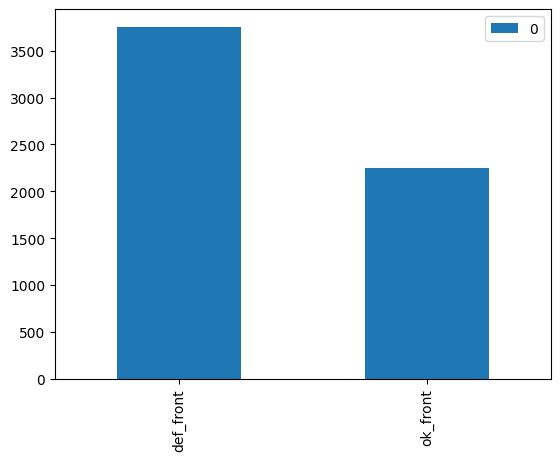

In [16]:
# your code goes here

import pandas as pd 
dist = pd.DataFrame( [len( data_train['def_front'] ), len( data_train['ok_front'] )] ) # replace training data with test data to look at test data distribution
dist.index = ['def_front', 'ok_front']
dist.plot.bar()

Continuing with data preparation, use the following code snippet to create `image_data_train` and `image_target_train` as well as `image_data_test` and `image_target_test` representing training features, training target variable, test features, and test target variable.

```python
import cv2  # you might need to install cv2 (search and learn how to install cv2 package!)
import numpy as np

# image dimensions
width = 15 
height = 15 

# defining the empty arrays
image_data_train = []
image_target_train = []

for title in files:
    path = <address to folder>
    os.chdir(path+'{}'.format(title))
    counter = 0
    for i in data_train[title]:
        img = cv2.imread(i,0)
        image_data_train.append(cv2.resize(img,(width, height)).flatten())
        image_target_train.append(title)
        counter += 1
```

Here, `<address to folder>` should be a string pointing at either `train` or `test` data folder. If creating test data, replace all `image_data_train` and `image_data_test` with `image_data_test` and `image_target_test` respectively.

In [ ]:
# your code goes here
import cv2  # you might need to install cv2 (search and learn how to install cv2 package!)
import numpy as np

# image dimensions
width = 15 
height = 15 

# defining the empty arrays
image_data_train = []
image_target_train = []

for title in files:
    path = <address to folder>
    os.chdir(path+'{}'.format(title))
    counter = 0
    for i in data_train[title]:
        img = cv2.imread(i,0)
        image_data_train.append(cv2.resize(img,(width, height)).flatten())
        image_target_train.append(title)
        counter += 1

Finally, following code snippet can convert the data into what that you can use for classification.

In [ ]:
from sklearn.preprocessing import LabelEncoder

labels = LabelEncoder()
labels.fit(image_target_train)

# data normalization
train_images = np.array(image_data_train) / 255.0
test_images = np.array(image_data_test) / 255.0

train_labels = labels.transform(image_target_train)
test_labels = labels.transform(image_target_test)

For each output array, rows are images and the columns are features.

<font color='red'> __Step IV:__ </font>: Use the `train_images` and `train_labels` to develop a logistic regression model. Then, use `test_images` and `test_labels` to test the accuracy of your developed model. Use at least two of the evaluation metrics we covered in class to evaluate the performance of this model.

In [ ]:
# your code goes here


<font color='red'> __Step V:__ </font>: Use the same data to develop an SVM model. Play around with hyper-parameters `C` and `Gamma` and change the `kernel` type to get good results. Use the same evaluation metrics as Step IV to evaluate the model's performance.

In [2]:
# your code goes here
